<a href="https://colab.research.google.com/github/2303A52131/AIML_2303A52131/blob/main/labexamaiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('/content/archive (11).zip')

print(data.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [ ]:
data = pd.get_dummies(data, drop_first=True)

X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with k=3: {accuracy:.2f}')

Accuracy with k=3: 0.82


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[6339  651]
 [ 933 1077]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


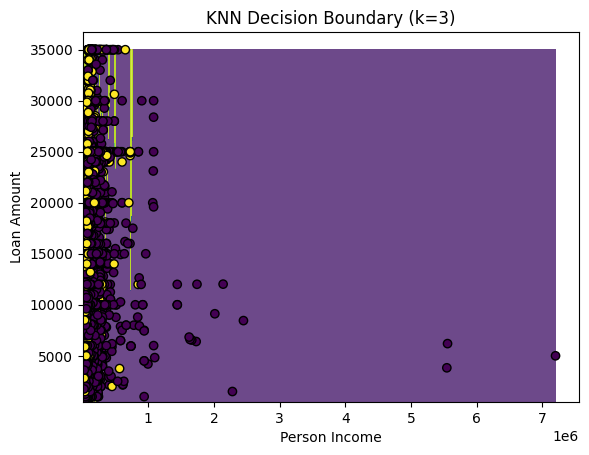

In [ ]:
X_vis = X[['person_income', 'loan_amnt']]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

knn.fit(X_train_vis, y_train_vis)

x_min, x_max = X_vis['person_income'].min() - 1, X_vis['person_income'].max() + 1
y_min, y_max = X_vis['loan_amnt'].min() - 1, X_vis['loan_amnt'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1000), np.arange(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)

plt.scatter(X_train_vis['person_income'], X_train_vis['loan_amnt'], c=y_train_vis, edgecolor='k', marker='o')
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.title('KNN Decision Boundary (k=3)')
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f'Accuracy with scaling: {accuracy_scaled:.2f}')

Accuracy with scaling: 0.88


In [ ]:
k_values = [1, 3, 5]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_k))

for k, acc in zip(k_values, accuracies):
    print(f'Accuracy with k={k}: {acc:.2f}')

Accuracy with k=1: 0.87
Accuracy with k=3: 0.88
Accuracy with k=5: 0.89
